# 1) Problem Statement

* This project aims to understands how the price of mobiles varies with the number of reviews, ratings and discounts offered by the different brands.

# 

# 2) Data Collection

* Dataset Source: https://www.kaggle.com/datasets/sunayanagawde/mobiles-dataset-from-flipkart
* There are 622 rows and 9 columns

## 2.1 Importing Data and Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Importing the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\charl\Downloads\flipkart_mobiles.csv")

df

,Name,Brand,Ratings,No_of_ratings,No_of_reviews,Product_features,MSP,MRP,Discount
0,"realme 9i (Prism Blue, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
1,"realme 9i (Prism Black, 64 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,10999,15999,31
2,"realme 9i (Prism Blue, 128 GB)",realme,4.5,25380,1517,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,13499,17999,25
3,"realme 9i (Prism Black, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
4,"realme 9i (Prism Blue, 128 GB)",realme,4.5,"1,11,865",6611,['4 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,10999,16999,35
...,...,...,...,...,...,...,...,...,...
617,"MOTOROLA e32 (Eco Black, 64 GB)",MOTOROLA,4.2,123,16,['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB'...,9499,11999,20
618,"REDMI Note 9 (Pebble Grey, 128 GB)",REDMI,4.3,"1,23,381",9426,['4 GB RAM | 128 GB ROM | Expandable Upto 512 ...,13499,16499,18
619,"SAMSUNG Galaxy A13 (Blue, 128 GB)",SAMSUNG,4.1,247,19,['6 GB RAM | 128 GB ROM | Expandable Upto 1 TB...,16999,20990,19
620,"REDMI Note 11 Pro (Star Blue, 128 GB)",REDMI,4.1,611,43,"['8 GB RAM | 128 GB ROM', '16.94 cm (6.67 inch...",19395,20689,6


### Shape of Dataset

In [3]:
df.shape

(622, 9)

## 2.2 Dataset Information

* Name : Model name of the mobile phone
* Brand : Brand name of the mobile
* Ratings : Ratings of the mobile (out of 5 stars)
* No_of_ratings : Number of total ratings of the mobile
* No_of_reviews : Number of customer feedbacks of the mobile
* Product_features : Specifications of the mobile
* MSP : Minimum selling price of the mobile
* MRP : Maximum retail price of the mobile
* Discount : Discount percentage of the mobile

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              622 non-null    object 
 1   Brand             622 non-null    object 
 2   Ratings           622 non-null    float64
 3   No_of_ratings     622 non-null    object 
 4   No_of_reviews     622 non-null    int64  
 5   Product_features  622 non-null    object 
 6   MSP               622 non-null    object 
 7   MRP               622 non-null    object 
 8   Discount          622 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 43.9+ KB


# 

# 3) Data Checks to Perform

* Check for Missing Values
* Check for Duplicates
* Check for Categorical Features
* Check for Unique values
* Check for Range of Values
* Check for Summary statistics
* Check for Correlations

## 3.1 Checking for missing values

In [5]:
df.isnull().sum()

Name                0
Brand               0
Ratings             0
No_of_ratings       0
No_of_reviews       0
Product_features    0
MSP                 0
MRP                 0
Discount            0
dtype: int64

## 3.2 Checking for Duplicates 

In [6]:
df.duplicated().sum()

0

## 3.3 Checking for Categorical features

In [7]:
# categorizing categorical and numerical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype=="int32" or df[feature].dtype=="int64"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"]


print("we have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("we have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 2 numerical features : ['No_of_reviews', 'Discount']
we have 6 categorical features : ['Name', 'Brand', 'No_of_ratings', 'Product_features', 'MSP', 'MRP']


## 3.4 Checking for Unique values

In [8]:
print("Categories in 'Brand' variable:\n ",end=" ")
print(df["Brand"].unique())

print("Categories in 'Modelnames' variable:\n ",end=" ")
print(df["Name"].unique())

print("Categories in 'Product_features' variable:\n ",end=" ")
print(df["Product_features"].unique())

print("Categories in 'Ratings' variables:\n", end =" ")
print(df["Ratings"].unique())

Categories in 'Brand' variable:
  ['realme' 'POCO' 'REDMI' 'APPLE' 'MOTOROLA' 'vivo' 'OPPO' 'Nokia'
 'Infinix' 'SAMSUNG' 'Micromax' 'Realme' 'LAVA' 'Google' 'Redmi' 'itel'
 'GREENBERRI' 'I' 'Moto' 'Kechaoda' 'Tecno' 'IQOO' 'DIZO' 'MTR' 'Nothing'
 'Xiaomi' 'BlackZone' 'Lvix' 'KARBONN' 'ANGAGE']
Categories in 'Modelnames' variable:
  ['realme 9i (Prism Blue, 64 GB)' 'realme 9i (Prism Black, 64 GB)'
 'realme 9i (Prism Blue, 128 GB)' 'realme 9i (Prism Black, 128 GB)'
 'POCO C31 (Shadow Gray, 64 GB)' 'REDMI 9i Sport (Metallic Blue, 64 GB)'
 'REDMI 9i Sport (Coral Green, 64 GB)'
 'APPLE iPhone 13 (Midnight, 128 GB)' 'MOTOROLA e40 (Carbon Gray, 64 GB)'
 'POCO C31 (Royal Blue, 64 GB)' 'POCO C31 (Royal Blue, 32 GB)'
 'REDMI 10 (Caribbean Green, 64 GB)' 'REDMI 10 (Midnight Black, 64 GB)'
 'REDMI 9i Sport (Carbon Black, 64 GB)' 'MOTOROLA e40 (Pink Clay, 64 GB)'
 'POCO M4 Pro 5G (Cool Blue, 64 GB)'
 'MOTOROLA g52 (Charcoal Grey, 128 GB)'
 'MOTOROLA G32 (Mineral Gray, 64 GB)' 'POCO M4 Pro 5G (Cool 

In [9]:
# Renaming values in the "Brand" column
df["Brand"] = df["Brand"].replace({"realme": "Realme", "REDMI": "Redmi", "MOTO": "MOTOROLA","Moto":"MOTOROLA"})

print(df["Brand"].unique())

['Realme' 'POCO' 'Redmi' 'APPLE' 'MOTOROLA' 'vivo' 'OPPO' 'Nokia'
 'Infinix' 'SAMSUNG' 'Micromax' 'LAVA' 'Google' 'itel' 'GREENBERRI' 'I'
 'Kechaoda' 'Tecno' 'IQOO' 'DIZO' 'MTR' 'Nothing' 'Xiaomi' 'BlackZone'
 'Lvix' 'KARBONN' 'ANGAGE']


In [10]:
df.nunique()

Name                540
Brand                27
Ratings              14
No_of_ratings       321
No_of_reviews       293
Product_features    360
MSP                 221
MRP                 203
Discount             42
dtype: int64

## 3.5 Checking for Range of Values

In [11]:
# converting categorical to numerical columns

df["No_of_ratings"] =df["No_of_ratings"].str.replace(",","").astype(int)       
df["MSP"] =df["MSP"].str.replace(",", "").astype(int)                  
df["MRP"] =df["MRP"].str.replace(",", "").astype(int)              

In [12]:
print(df)

                                      Name     Brand  Ratings  No_of_ratings  \
0            realme 9i (Prism Blue, 64 GB)    Realme      4.5         111865   
1           realme 9i (Prism Black, 64 GB)    Realme      4.5         111865   
2           realme 9i (Prism Blue, 128 GB)    Realme      4.5          25380   
3          realme 9i (Prism Black, 128 GB)    Realme      4.5         111865   
4           realme 9i (Prism Blue, 128 GB)    Realme      4.5         111865   
..                                     ...       ...      ...            ...   
617        MOTOROLA e32 (Eco Black, 64 GB)  MOTOROLA      4.2            123   
618     REDMI Note 9 (Pebble Grey, 128 GB)     Redmi      4.3         123381   
619      SAMSUNG Galaxy A13 (Blue, 128 GB)   SAMSUNG      4.1            247   
620  REDMI Note 11 Pro (Star Blue, 128 GB)     Redmi      4.1            611   
621    OPPO F21 Pro (Cosmic Black, 128 GB)      OPPO      4.3           1756   

     No_of_reviews                     

In [13]:
# checking datatypes infos after conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              622 non-null    object 
 1   Brand             622 non-null    object 
 2   Ratings           622 non-null    float64
 3   No_of_ratings     622 non-null    int32  
 4   No_of_reviews     622 non-null    int64  
 5   Product_features  622 non-null    object 
 6   MSP               622 non-null    int32  
 7   MRP               622 non-null    int32  
 8   Discount          622 non-null    int64  
dtypes: float64(1), int32(3), int64(2), object(3)
memory usage: 36.6+ KB


In [14]:
df.isnull().sum()

Name                0
Brand               0
Ratings             0
No_of_ratings       0
No_of_reviews       0
Product_features    0
MSP                 0
MRP                 0
Discount            0
dtype: int64

In [15]:
# categorizing categorical and numerical columns after dtypes conversion

numerical_features = [feature for feature in df.columns if df[feature].dtype=="int32" or df[feature].dtype=="int64" or df[feature].dtype=="float32"or df[feature].dtype=="float64"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"]


print("we have {} numerical features : {}".format(len(numerical_features), numerical_features))
print("we have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 6 numerical features : ['Ratings', 'No_of_ratings', 'No_of_reviews', 'MSP', 'MRP', 'Discount']
we have 3 categorical features : ['Name', 'Brand', 'Product_features']


## 3.6 Checking for Statistical Summary

In [16]:
# Summary Stats of numerical columns after dtype conversion

df.describe()

,Ratings,No_of_ratings,No_of_reviews,MSP,MRP,Discount
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,4.267203,47068.581994,3393.704180,17485.704180,21866.901929,18.442122
std,0.188438,77473.913788,5212.468223,17673.110733,21046.019239,11.195627
min,3.400000,9.000000,0.000000,679.000000,729.000000,1.000000
25%,4.200000,1948.250000,201.000000,8999.000000,10999.000000,9.000000
50%,4.300000,14318.000000,1277.000000,12999.000000,16999.000000,18.000000
75%,4.400000,58490.000000,4608.000000,17999.000000,22999.000000,28.000000
max,4.800000,575591.000000,34744.000000,114900.000000,139900.000000,46.000000


## 3.7 Checking for Correlation

In [17]:
# correlation of numerical columns after dtype conversion

df.corr()

,Ratings,No_of_ratings,No_of_reviews,MSP,MRP,Discount
Ratings,1.000000,0.358051,0.315149,0.561165,0.557508,0.144506
No_of_ratings,0.358051,1.000000,0.971827,0.074823,0.073014,0.019328
No_of_reviews,0.315149,0.971827,1.000000,0.055559,0.063520,0.065908
MSP,0.561165,0.074823,0.055559,1.000000,0.980142,-0.034512
MRP,0.557508,0.073014,0.063520,0.980142,1.000000,0.107046
Discount,0.144506,0.019328,0.065908,-0.034512,0.107046,1.000000


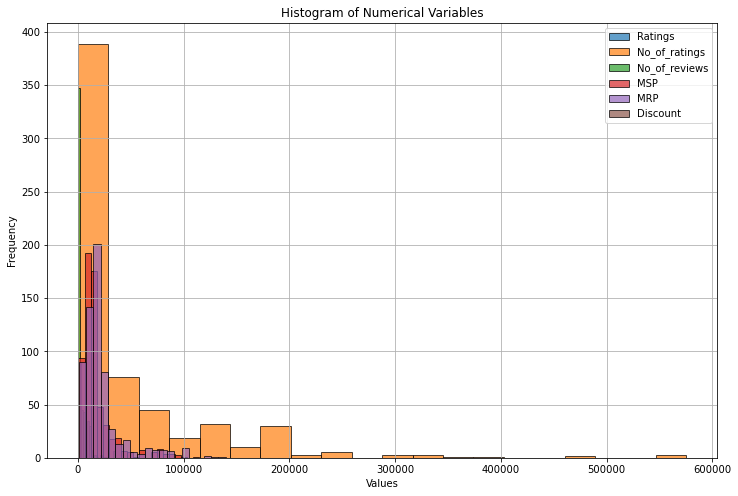

In [18]:
# histograms for all numerical variables

plt.figure(figsize=(12, 8))
for column in df.select_dtypes(include=['float64','float32', 'int64','int32']).columns:
    sns.distplot(df[column], bins=20, kde=False, hist_kws={'edgecolor': 'black', 'alpha': 0.7}, label=column)

plt.title('Histogram of Numerical Variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

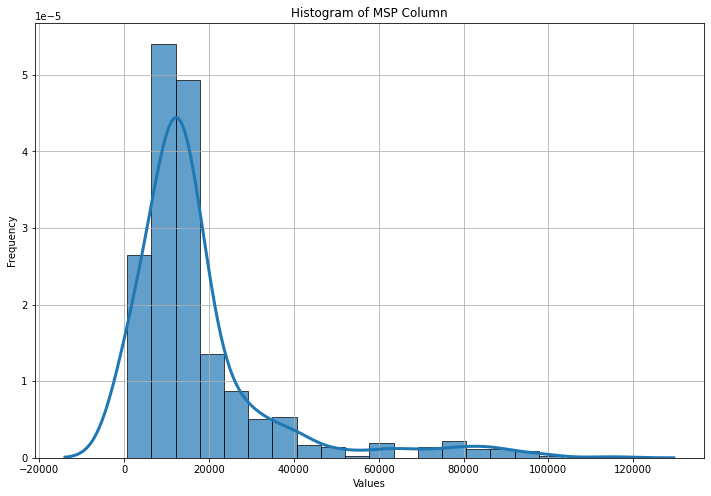

In [19]:
# histogram for "MSP"

plt.figure(figsize=(12, 8))
sns.distplot(df['MSP'], bins=20, kde=True, hist=True, kde_kws={'linewidth': 3}, hist_kws={'edgecolor': 'black', 'alpha': 0.7})
plt.title('Histogram of MSP Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 

# 4) Exploring Data Visualization 

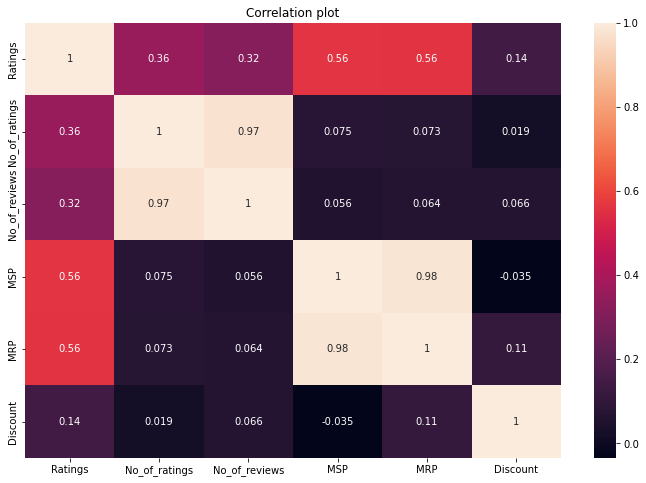

In [20]:
# Heatmap correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation plot")
plt.show()

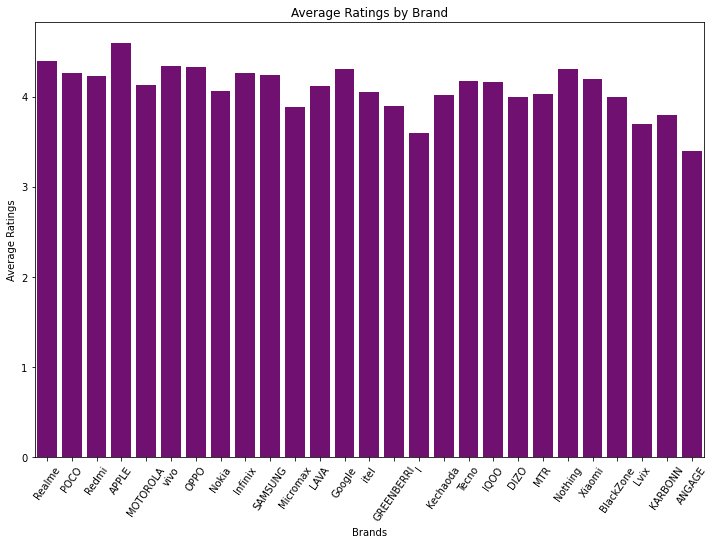

In [21]:
# Bar plot showing the mean Ratings for each Brand

plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='Ratings', data=df, color = "purple",ci=None)
plt.title('Average Ratings by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Ratings')
plt.xticks(rotation=55)
plt.show()

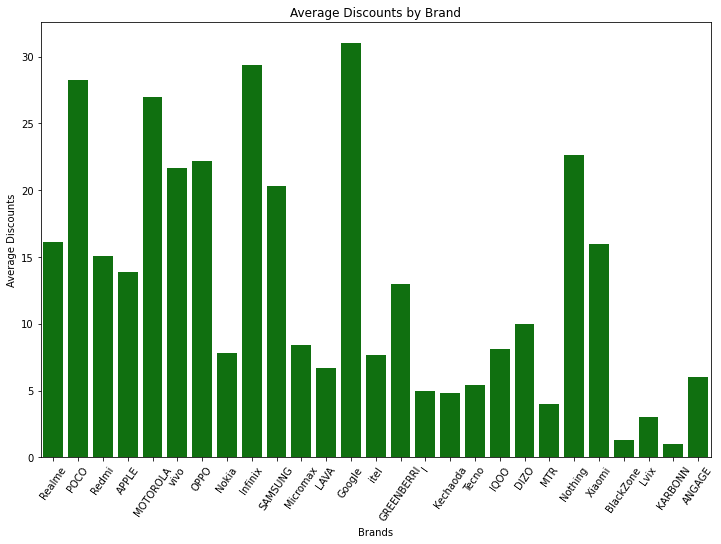

In [22]:
# Bar plot showing the mean Discounts for each Brand

plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='Discount', data=df, color = "green",ci =None)
plt.title('Average Discounts by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Discounts')
plt.xticks(rotation=55)
plt.show()

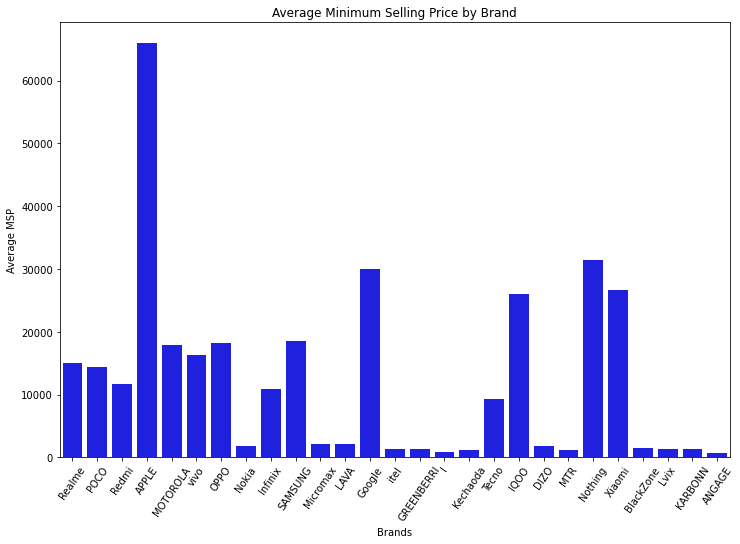

In [23]:
# Bar plot showing the mean MSP for each Brand

plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='MSP', data=df, color = "blue",ci =None)
plt.title('Average Minimum Selling Price by Brand')
plt.xlabel('Brands')
plt.ylabel('Average MSP')
plt.xticks(rotation=55)
plt.show()

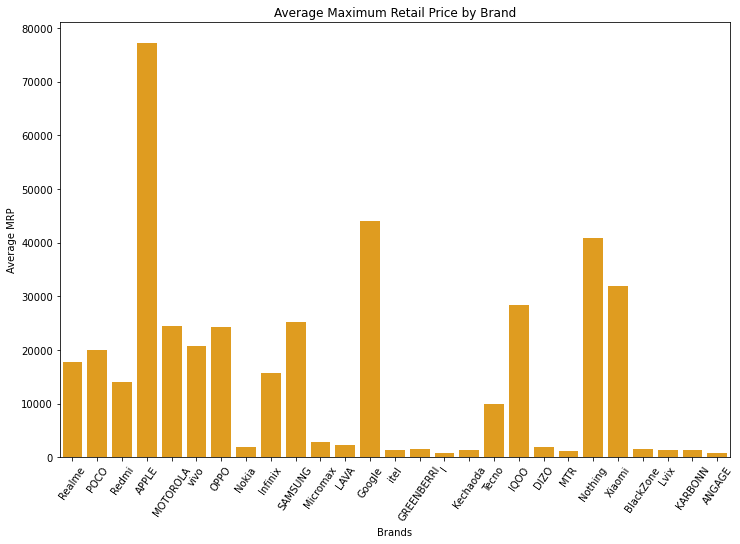

In [24]:
# Bar plot showing the mean MRP for each Brand

plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='MRP', data=df, color = "orange",ci =None)
plt.title('Average Maximum Retail Price by Brand')
plt.xlabel('Brands')
plt.ylabel('Average MRP')
plt.xticks(rotation=55)
plt.show()

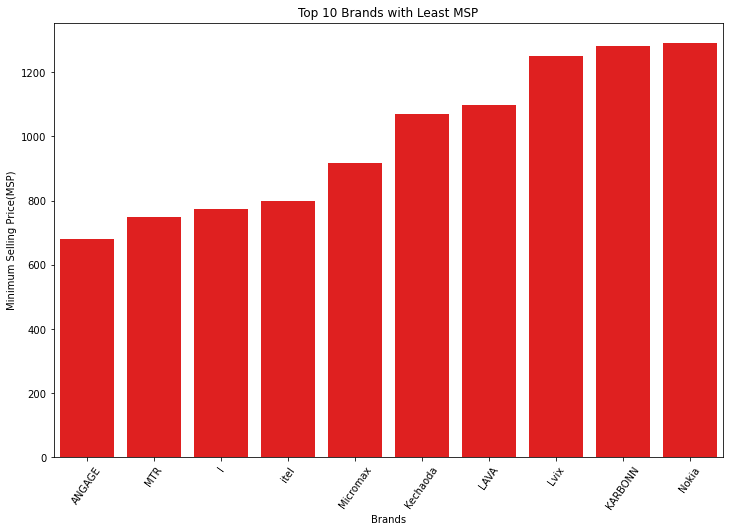

In [25]:
# Sort the DataFrame for top 10 brands with the least MSP
min_msp_by_brand = df.groupby('Brand')['MSP'].min()
df_sorted_msp = min_msp_by_brand.nsmallest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=df_sorted_msp.index, y=df_sorted_msp.values, color ='red', ci=None)
plt.title('Top 10 Brands with Least MSP')
plt.xlabel('Brands')
plt.ylabel('Minimum Selling Price(MSP)')
plt.xticks(rotation=55)
plt.show()

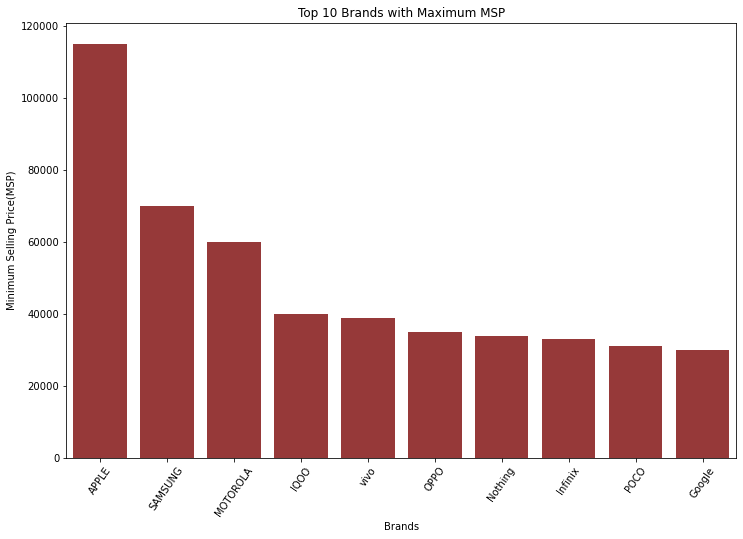

In [26]:
# Sort the DataFrame for top 10 brands with the max MSP
max_msp_by_brand = df.groupby('Brand')['MSP'].max()
df_sorted_msp = max_msp_by_brand.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=df_sorted_msp.index, y=df_sorted_msp.values, color ='brown' , ci=None)
plt.title('Top 10 Brands with Maximum MSP')
plt.xlabel('Brands')
plt.ylabel('Minimum Selling Price(MSP)')
plt.xticks(rotation=55)
plt.show()

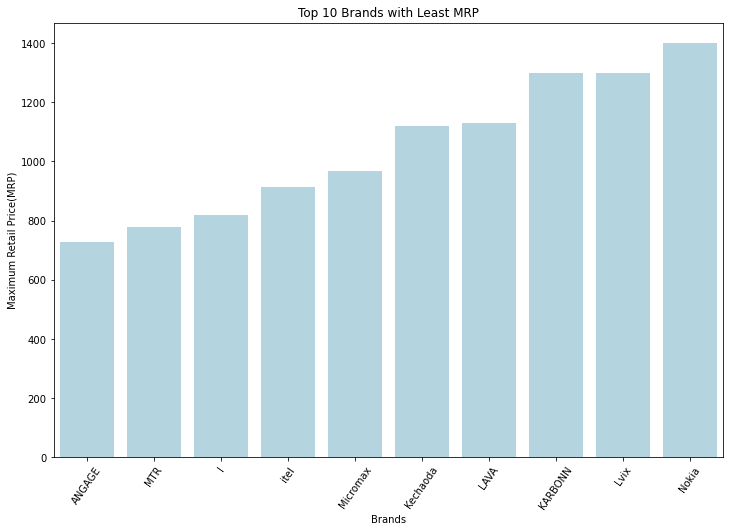

In [27]:
# Sort the DataFrame for top 10 brands with the least MRP
min_mrp_by_brand = df.groupby('Brand')['MRP'].min()
df_sorted_mrp = min_mrp_by_brand.nsmallest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=df_sorted_mrp.index, y=df_sorted_mrp.values, color='lightblue', ci=None)
plt.title('Top 10 Brands with Least MRP')
plt.xlabel('Brands')
plt.ylabel('Maximum Retail Price(MRP)')
plt.xticks(rotation=55)
plt.show()

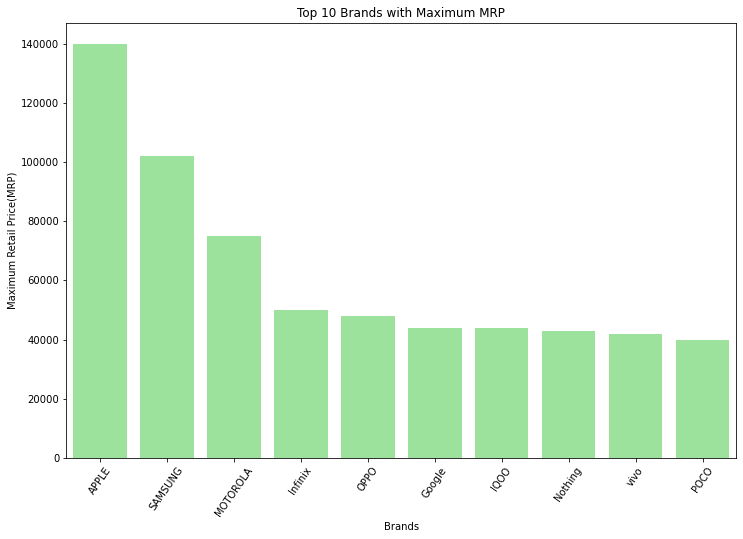

In [28]:
# Sort the DataFrame for top 10 brands with the max MRP
max_mrp_by_brand = df.groupby('Brand')['MRP'].max()
df_sorted_mrp = max_mrp_by_brand.nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=df_sorted_mrp.index, y=df_sorted_mrp.values, color='lightgreen', ci=None)
plt.title('Top 10 Brands with Maximum MRP')
plt.xlabel('Brands')
plt.ylabel('Maximum Retail Price(MRP)')
plt.xticks(rotation=55)
plt.show()

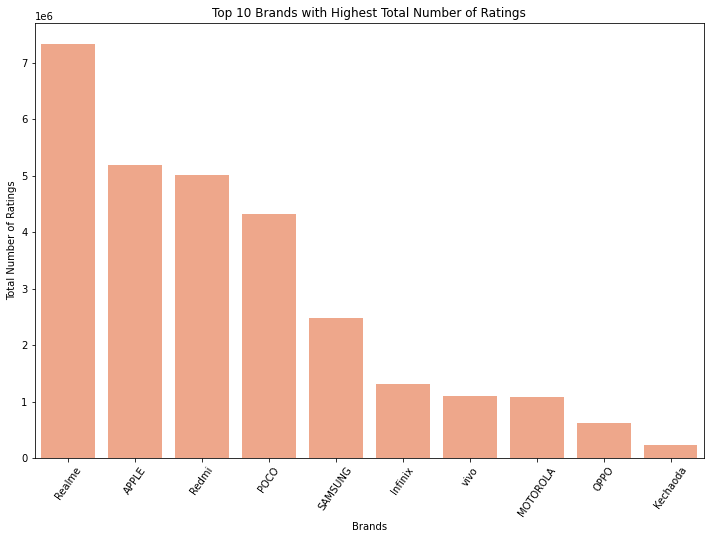

In [29]:
# Calculate total number of ratings for each brand
total_ratings_by_brand = df.groupby('Brand')['No_of_ratings'].sum()

sorted_brands = total_ratings_by_brand.sort_values(ascending=False)

top_10_high_ratings = sorted_brands.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_high_ratings.index, y=top_10_high_ratings.values, color='lightsalmon', ci=None)
plt.title('Top 10 Brands with Highest Total Number of Ratings')
plt.xlabel('Brands')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=55)
plt.show()

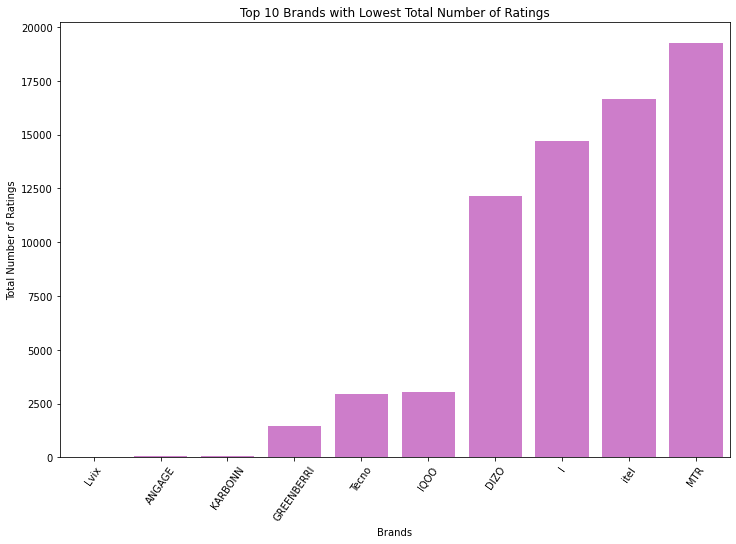

In [30]:
# top 10 brands with lowest total number of ratings

bottom_10_low_ratings = sorted_brands.tail(10)[::-1]
plt.figure(figsize=(12, 8))
sns.barplot(x=bottom_10_low_ratings.index, y=bottom_10_low_ratings.values, color='orchid', ci=None)
plt.title('Top 10 Brands with Lowest Total Number of Ratings')
plt.xlabel('Brands')
plt.ylabel('Total Number of Ratings')
plt.xticks(rotation=55)
plt.show()

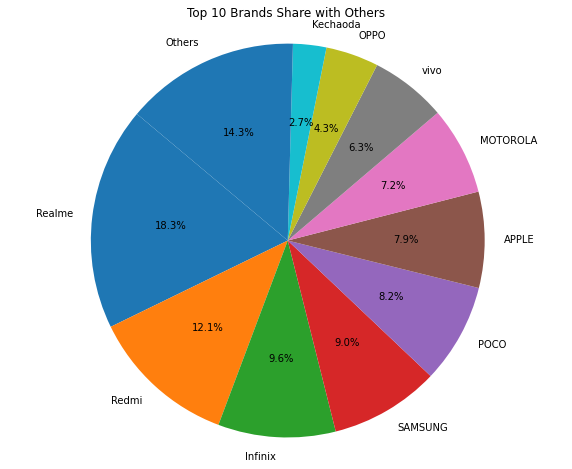

In [31]:
# Aggregate metrics for brands with the same names
combined_df = df.groupby('Brand').agg({
    'Ratings': 'mean',
    'No_of_ratings': 'sum',
    'No_of_reviews': 'sum',
    'MSP': 'mean',
    'MRP': 'mean',
    'Discount': 'mean'
}).reset_index()

# Brand value counts
brand_counts = df['Brand'].value_counts()
brand_share = brand_counts / brand_counts.sum()

combined_df['Brand_Share'] = brand_share.loc[combined_df['Brand']].values
combined_df = combined_df.sort_values(by='Brand_Share', ascending=False)

# Creating DataFrame for the top 10 brands and the rest as "Others"
top_10_brands = combined_df.head(10)
others_share = combined_df.iloc[10:]['Brand_Share'].sum()
others_df = pd.DataFrame({'Brand': ['Others'], 'Brand_Share': [others_share]})

combined_df = pd.concat([top_10_brands, others_df])

# pie plot using the brand share metrics for the top 10 brands and "Others"
plt.figure(figsize=(10, 8))
plt.pie(combined_df['Brand_Share'], labels=combined_df['Brand'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Brands Share with Others')
plt.axis('equal')
plt.show()
